,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


# Multilabel Classification with Python

## Multilabel Dataset Examples
- https://sci2s.ugr.es/keel/multilabel.php#sub10





```
# Steps to be followed
```
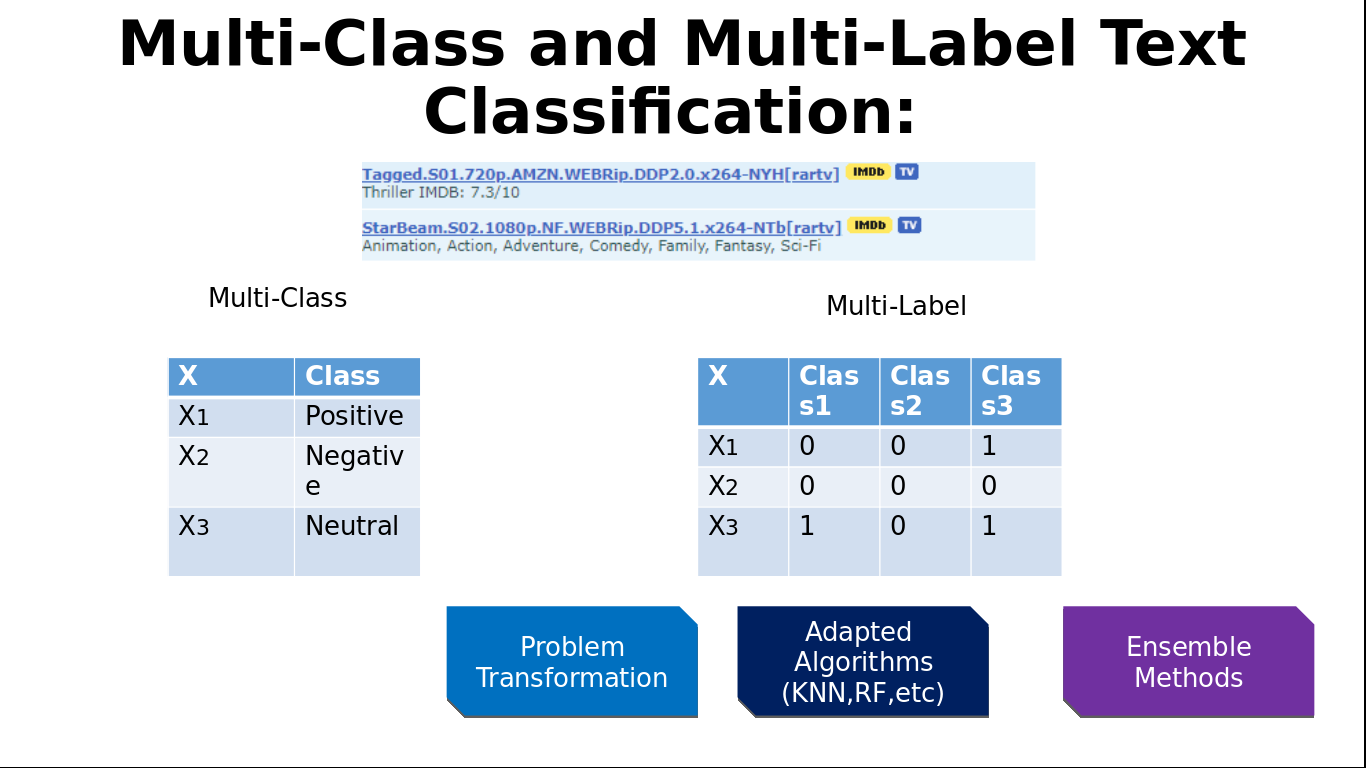



# Solution for Multi-Label Problem
1. Methods for solving Multi-label Classification Problems
- Problem Transformation
- Adapted Algorithm
- Ensemble approaches

# Problem Transformation
2. It refers to transforming the multi-label problem into single-label problem(s) by using
- Binary Relevance: treats each label as a separate single class 
- classification
Classifier Chains:In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.
- Label Powerset:we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

# Adapted Algorithm
3. adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

In [2]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 4.1 MB/s 


In [5]:
# load EDA libraries
import pandas as pd
import numpy as np

# load data viz pkgs
import matplotlib.pyplot as plt
import seaborn as sns

# ML pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

# Split dataset into train and text
from sklearn.model_selection import train_test_split
# feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# Multi label pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [6]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Multi_Label_Text_Classification_with_Skmultilearn/data/so_dataset_2_tags.csv')

In [8]:
df.sample(5)

,title,tags,mysql,python,php
101,"Error in SQL syntax, check for right syntax to...","['php', 'mysql']",1,0.0,1.0
140,SQLAlchemy reconnect to db,"['python', 'mysql']",1,1.0,0.0
39,How can I pass an array of PDO parameters yet ...,"['php', 'mysql']",1,0.0,1.0
29,Using PyMySQL with MariaDB,"['python', 'mysql']",1,1.0,0.0
77,MySQL: Get data from other table matching the ids,"['php', 'mysql']",1,0.0,1.0


In [9]:
df.loc[0].title

'Flask-SQLAlchemy - When are the tables/databases created and destroyed?'

In [10]:
df.dtypes

title      object
tags       object
mysql       int64
python    float64
php       float64
dtype: object

In [11]:
# Convert to Float
df['mysql'] = df['mysql'].astype(float)

In [12]:
df.dtypes

title      object
tags       object
mysql     float64
python    float64
php       float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


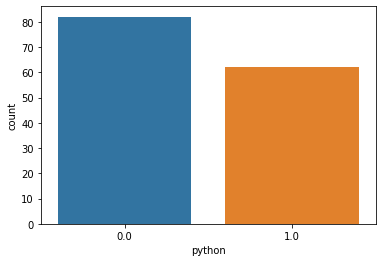

In [14]:
# Value counts
sns.countplot(df['python'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


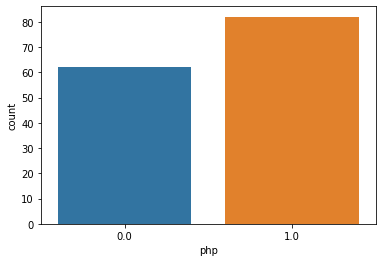

In [15]:
# Value counts
sns.countplot(df['php'])

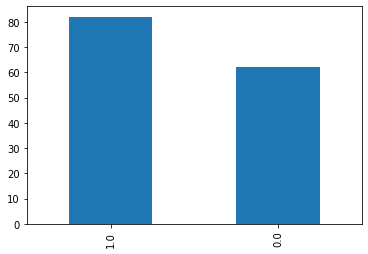

In [16]:
df['php'].value_counts().plot(kind='bar')

# Text Preprocessing
- neattext : remove_stopwords
- pip install neattext

In [17]:
!pip install neattext

     |████████████████████████████████| 114 kB 5.8 MB/s 


In [18]:
import neattext as nt
import neattext.functions as nfx

In [19]:
# Explore for noise
df['title'].apply(lambda x: nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'text_lengt...
1      {'text_noise': 4.651162790697675, 'text_length...
2      {'text_noise': 9.90990990990991, 'text_length'...
3      {'text_noise': 8.47457627118644, 'text_length'...
4      {'text_noise': 2.631578947368421, 'text_length...
                             ...                        
139    {'text_noise': 26.41509433962264, 'text_length...
140    {'text_noise': 3.8461538461538463, 'text_lengt...
141    {'text_noise': 6.666666666666667, 'text_length...
142    {'text_noise': 13.636363636363635, 'text_lengt...
143    {'text_noise': 7.142857142857142, 'text_length...
Name: title, Length: 144, dtype: object

In [23]:
# Extracting all stopwords 

df['title'].apply(lambda x: nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [29]:
#dir(nfx)

In [26]:
# Explore more cleaning texts
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [38]:
corpus = df['title'].apply(nfx.remove_stopwords)

In [41]:
corpus

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

# Feature Engineering
- Build feature from our text
- TFIDF countvectorizer ,bow

In [35]:
tfidf = TfidfVectorizer()
tfidf 

TfidfVectorizer()

In [43]:

#build features
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [44]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1.0,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1.0,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1.0,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1.0,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1.0,0.0,1.0


In [46]:
y = df[['mysql', 'python', 'php']]

In [48]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, y, test_size=0.3, random_state= 42 )

In [49]:
print(df['title'].shape)
print(X_train.shape)

(144,)
(100, 404)


# Building our model
# Estimator + Multilabel Estimator

In [50]:
# Problem Transform
import skmultilearn
dir(skmultilearn)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'adapt',
 'base',
 'problem_transform',
 'utils']

# Binary Relevance classification
- Convert Our Multi-Label Prob to Multi-Class
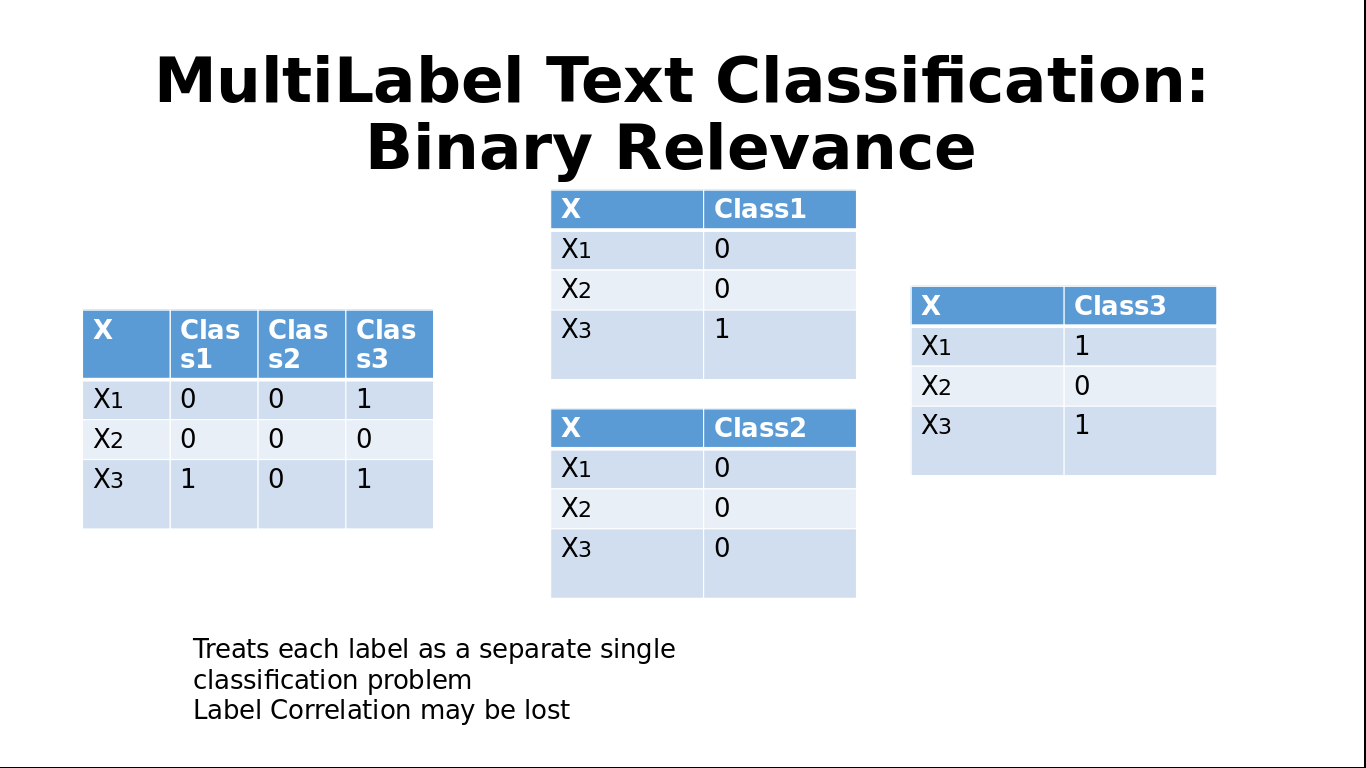

In [51]:
# Convert our multi-label prob to multi-class
# binary classification

binary_rel_clf = BinaryRelevance(MultinomialNB())

In [52]:
binary_rel_clf.fit(X_train, y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [53]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)

In [54]:
br_prediction

<44x3 sparse matrix of type '<class 'numpy.float64'>'
	with 88 stored elements in Compressed Sparse Column format>

In [55]:
# Convert to Array to see result
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [56]:
# Accuracy
accuracy_score(y_test, br_prediction)

0.9090909090909091

In [57]:
# Hamming loss : Incorrect predictions
# the lower the result the better
hamming_loss(y_test, br_prediction)

0.06060606060606061

# Classifier Chains
- Preserve Label Correlation
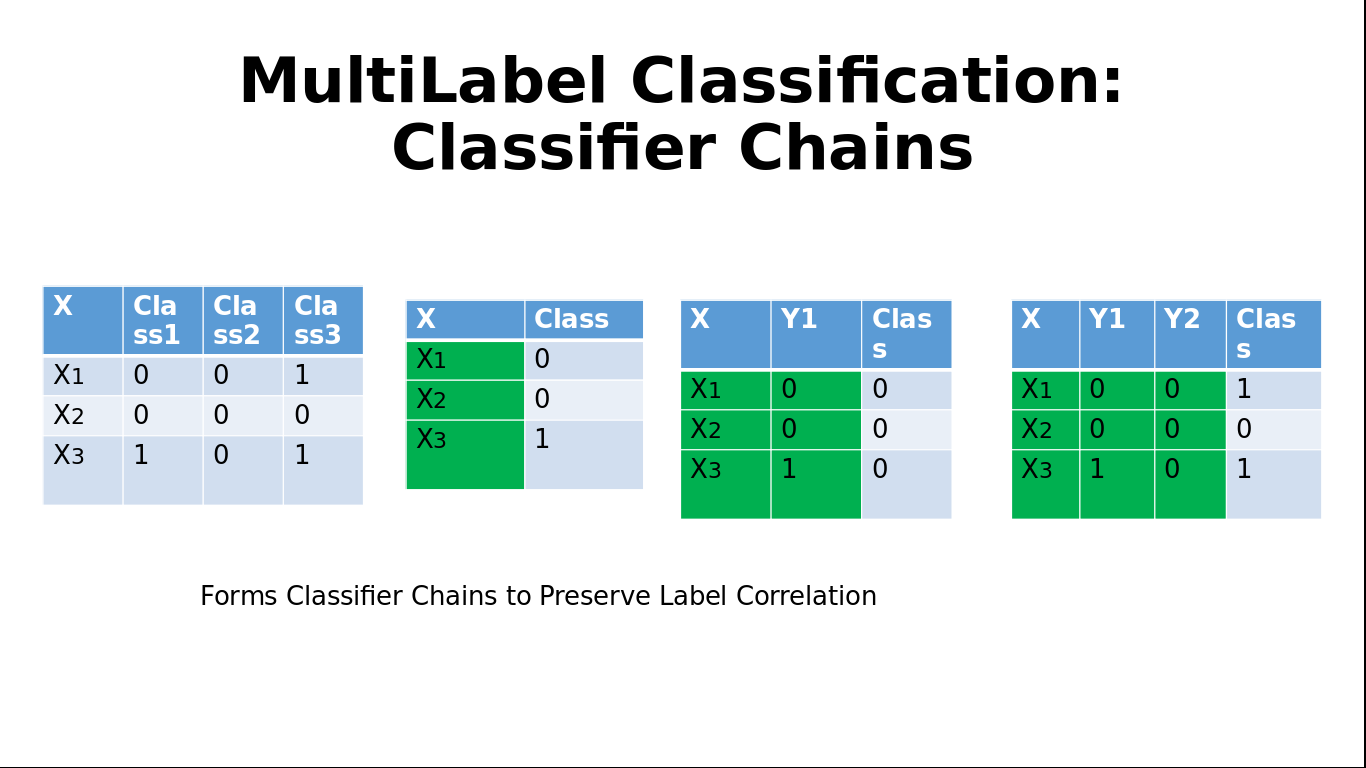

In [58]:
def build_model(model, mlb_estimator, xtrain, ytrain, xtest, ytest):
  # Create an Instance
  clf = mlb_estimator(model)
  clf.fit(xtrain, ytrain)
  # Predict
  clf_predictions = clf.predict(xtest)
  #Check for accuracy
  acc = accuracy_score(ytest, clf_predictions)
  ham = hamming_loss(ytest, clf_predictions)
  result = {"accuracy" : acc,
            "hamming_score" : ham}
  return result

In [59]:
clf_chain_model = build_model(MultinomialNB(), ClassifierChain, X_train, y_train, X_test, y_test)

In [60]:
clf_chain_model

{'accuracy': 0.8409090909090909, 'hamming_score': 0.10606060606060606}

# LabelPowerset
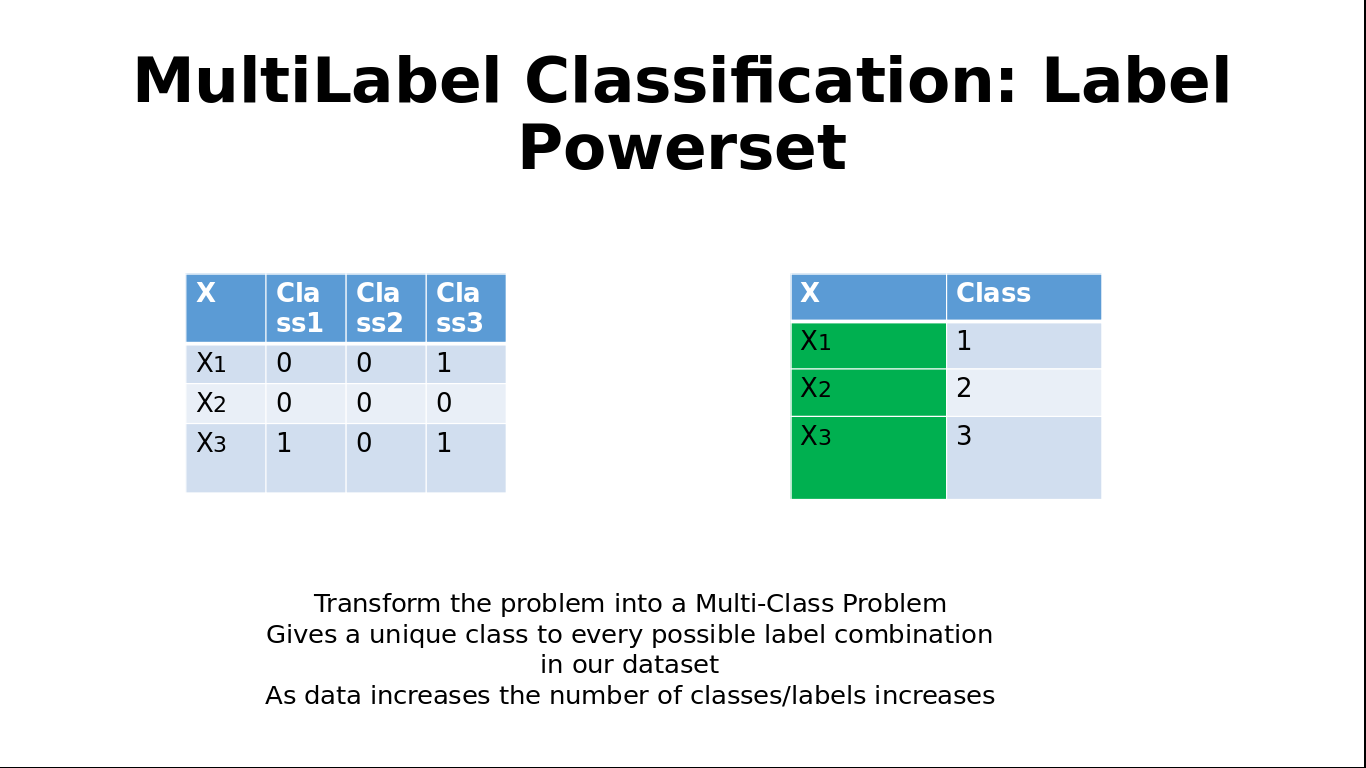

In [61]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)


In [62]:
clf_labelP_model

{'accuracy': 0.9090909090909091, 'hamming_score': 0.06060606060606061}

# ### Apply On A Simple Ttitle/Question


In [66]:
ex1 = df['title'].iloc[0]
ex1


'Flask-SQLAlchemy - When are the tables/databases created and destroyed?'

In [64]:
# Vectorized 
vec_example = tfidf.transform([ex1])

In [65]:
# Make our prediction
binary_rel_clf.predict(vec_example).toarray()

array([[1., 1., 0.]])

In [68]:
import joblib
# Save model
binary_rel_clf_file = open('binary_rel_clf_model_fild.pkl', 'wb')
joblib.dump(binary_rel_clf, binary_rel_clf_file)
binary_rel_clf_file.close()

In [69]:
# Save Vectorizer
tfidf_vectorizer_file = open("tfidf_vectorizer_SO_tags_file.pkl","wb")
joblib.dump(tfidf,tfidf_vectorizer_file)
tfidf_vectorizer_file.close()